## ENTRENAMIENTO MODELO Y EVALUACIÓN

In [1]:
import pandas as pd
import pickle 

In [2]:
df = pd.read_csv('../data/train/train1.csv')
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,danceability_category_encoded,loudness_category_numerica,loudness_category_numerica2,valence_cat_num,speech_cat_num,speech_cat_num2,energy_cat_num,energy_cat_num2,popularity_cat_num,popularity_cat_num2
0,33018.0,Staind,Zoe Jane,52.0,0.01460,0.505,276840.0,0.687,0.021800,D#,...,0,5.0,9.0,0.0,0.0,0.0,3.0,6.0,2.0,6.0
1,83669.0,Ella Fitzgerald,People Will Say We're In Love,32.0,0.75300,0.304,-1.0,0.309,0.000000,G#,...,0,1.0,6.0,2.0,0.0,0.0,1.0,2.0,1.0,4.0
2,28174.0,empty_field,Glow Like Dat,65.0,0.41100,0.787,210862.0,0.586,0.000311,A#,...,1,5.0,9.0,4.0,1.0,2.0,2.0,7.0,3.0,2.0
3,39987.0,Pop Evil,Boss's Daughter,44.0,0.00016,0.418,-1.0,0.966,0.005690,G,...,0,4.0,6.0,4.0,4.0,14.0,4.0,4.0,2.0,6.0
4,55319.0,Frank Zappa,Muffin Man,48.0,0.11100,0.412,337733.0,0.657,0.000088,F#,...,0,1.0,6.0,6.0,1.0,2.0,3.0,6.0,2.0,6.0


In [3]:
df1 = pd.read_csv('../data/test/test1.csv')
df1.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,danceability_category_encoded,loudness_category_numerica,loudness_category_numerica2,valence_cat_num,speech_cat_num,speech_cat_num2,energy_cat_num,energy_cat_num2,popularity_cat_num,popularity_cat_num2
0,24735.0,The Dead Weather,Bone House,25.0,0.007730,0.530,206800.0,0.896,0.003030,G,...,1,5.0,9.0,2.0,2.0,6.0,4.0,4.0,1.0,4.0
1,41022.0,ZAQ,Last Proof - Instrumental,14.0,0.000015,0.378,284413.0,0.846,0.746000,G#,...,0,5.0,9.0,4.0,1.0,2.0,4.0,4.0,0.0,0.0
2,69676.0,!!!,Californiyeah,36.0,0.024900,0.865,274013.0,0.650,0.000391,A,...,1,5.0,9.0,4.0,2.0,6.0,3.0,6.0,1.0,4.0
3,71071.0,Norah Jones,Lonestar,52.0,0.888000,0.642,186080.0,0.139,0.000014,C,...,1,1.0,6.0,2.0,0.0,0.0,0.0,0.0,2.0,6.0
4,39042.0,Greta Van Fleet,Rolling In The Deep - Recorded At Spotify Stud...,64.0,0.005700,0.615,237653.0,0.487,0.002990,B,...,1,1.0,6.0,2.0,0.0,0.0,2.0,7.0,3.0,2.0


In [4]:
# Datos entrenamiento
X_train = df[['popularity',
       'acousticness',
       'instrumentalness',
        'valence',  'loudness_category_numerica2',
       'speech_cat_num2',
        'energy_cat_num2']]
y_train = df["danceability_category_encoded"]

In [5]:
# Datos test
X_test = df1[['popularity',
       'acousticness',
       'instrumentalness',
        'valence',  'loudness_category_numerica2',
       'speech_cat_num2',
        'energy_cat_num2']]
y_test = df1["danceability_category_encoded"]

## Vamos a generar otros datos de test y train para cambiar las variables predictoras

In [73]:
# Datos entrenamiento
X_train1 = df[[
       'acousticness',
    
        'valence',
       'speech_cat_num2',
        'energy_cat_num2']]
y_train1 = df["danceability_category_encoded"]



# Datos test
X_test1 = df1[[
       'acousticness',
    
        'valence',
       'speech_cat_num2',
        'energy_cat_num2']]
y_test1 = df1["danceability_category_encoded"]

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


## Modelo 1: Random Forest Classifier 

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline


steps = [('classifier', RandomForestClassifier(random_state=42))]
pipeline = Pipeline(steps)


param_dist = {
      'classifier__n_estimators': [60, 65],
    'classifier__max_depth': [9, 10, 15],
    'classifier__max_leaf_nodes': [90, 95],
    'classifier__min_samples_split': [20, 25, 30]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=4, n_iter=30, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)


final_model = random_search.best_estimator_


best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_


final_model.fit(X_train, y_train)



print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best Score: 0.75125
Best Parameters: {'classifier__n_estimators': 65, 'classifier__min_samples_split': 25, 'classifier__max_leaf_nodes': 95, 'classifier__max_depth': 15}
Best Estimator: Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=15, max_leaf_nodes=95,
                                        min_samples_split=25, n_estimators=65,
                                        random_state=42))])


In [80]:
# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train)
pred_proba_train = final_model.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train))
print('Recall:', recall_score(y_train, pred_train))
print('F1 Score:', f1_score(y_train, pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test)
pred_proba_test = final_model.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test))
print('Recall:', recall_score(y_test, pred_test))
print('F1 Score:', f1_score(y_test, pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 0.76265
Precision: 0.7533254404902848
Recall: 0.8997670936616203
F1 Score: 0.8200598915886433
Confusion Matrix:
 [[ 8872  7084]
 [ 2410 21634]]
Resultados sobre TEST
Accuracy: 0.7435
Precision: 0.7395862068965517
Recall: 0.8878953469117403
F1 Score: 0.8069832192038529
Confusion Matrix:
 [[2073 1888]
 [ 677 5362]]


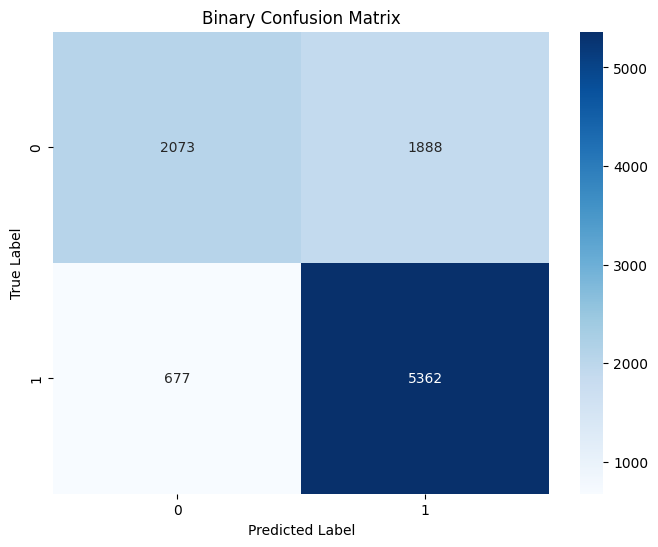

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

c_matrix_binary = confusion_matrix(y_test, pred_test)


plt.figure(figsize=(8, 6))


sns.heatmap(c_matrix_binary, annot=True, cmap='Blues', fmt='g')

plt.title('Binary Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


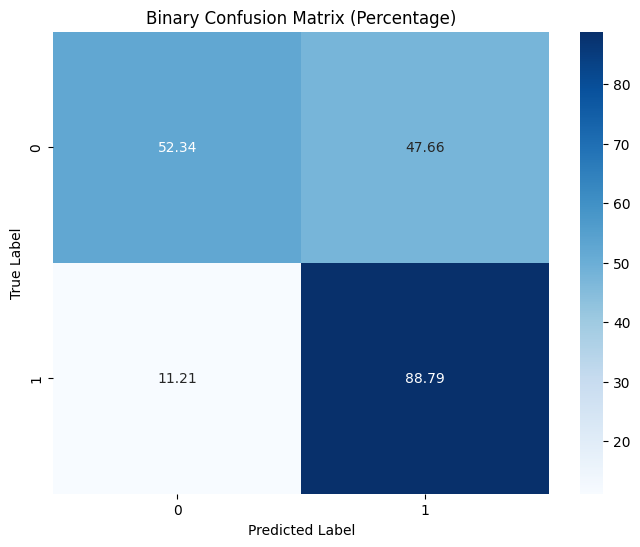

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


c_matrix_binary = confusion_matrix(y_test, pred_test)

total_samples = c_matrix_binary.sum(axis=1)[:, np.newaxis]
c_matrix_binary_percent = (c_matrix_binary / total_samples) * 100


plt.figure(figsize=(8, 6))


sns.heatmap(c_matrix_binary_percent, annot=True, cmap='Blues', fmt='.2f')

plt.title('Binary Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
filename = '../models_class/final_model1.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_model, archivo_salida)

### Model 2: XGboost Classifier

In [113]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline


steps = [('classifier', XGBClassifier(random_state=42))]
pipeline = Pipeline(steps)


param_dist = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__max_depth': [9, 10, 15],
    'classifier__learning_rate': [0.04,0.05],
    'classifier__subsample': [0.8, 0.9],
    'classifier__colsample_bytree': [0.8, 0.9],
    'classifier__gamma': [0, 0.1],
    'classifier__reg_alpha': [0.05, 0.3,0.5],
    'classifier__reg_lambda': [ 0.3,0.4]
}


random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=4, n_iter=30, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)


final_model1 = random_search.best_estimator_


best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_


final_model1.fit(X_train, y_train)

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best Score: 0.7609250000000001
Best Parameters: {'classifier__subsample': 0.9, 'classifier__reg_lambda': 0.3, 'classifier__reg_alpha': 0.05, 'classifier__n_estimators': 200, 'classifier__max_depth': 15, 'classifier__learning_rate': 0.04, 'classifier__gamma': 0.1, 'classifier__colsample_bytree': 0.9}
Best Estimator: Pipeline(steps=[('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.9, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.04,
                    

In [119]:
import pandas as pd


booster = final_model1.named_steps['classifier'].get_booster()


importance_dict = booster.get_score(importance_type='weight')

importance_df = pd.DataFrame(importance_dict.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df




,Feature,Importance
3,valence,53563.0
1,acousticness,49784.0
2,instrumentalness,46832.0
0,popularity,42932.0
5,speech_cat_num2,9911.0
6,energy_cat_num2,7162.0
4,loudness_category_numerica2,6696.0


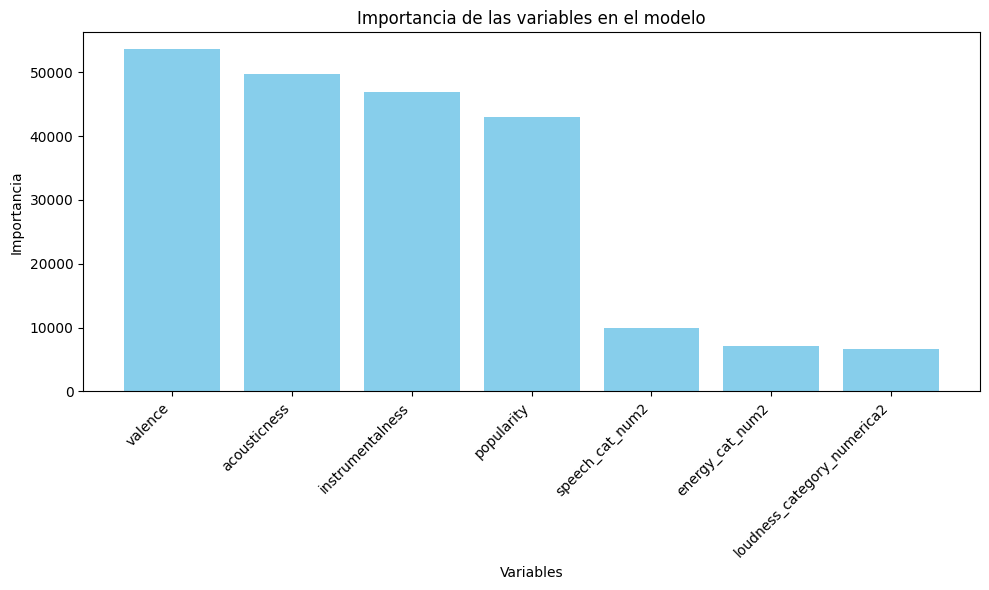

In [128]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las variables en el modelo')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se solapen
plt.show()


In [ ]:
"#77AC30", "#A2142F"

In [1]:
import matplotlib.pyplot as plt

# Lista de colores para cada barra
colors = ['#77AC30', '#77AC30', '#77AC30', '#77AC30', '#A2142F', '#A2142F', '#A2142F', '#A2142F', '#A2142F']

# Crear el gráfico de barras con colores personalizados
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las variables en el modelo')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se solapen
plt.show()


NameError: name 'importance_df' is not defined

<Figure size 1000x600 with 0 Axes>

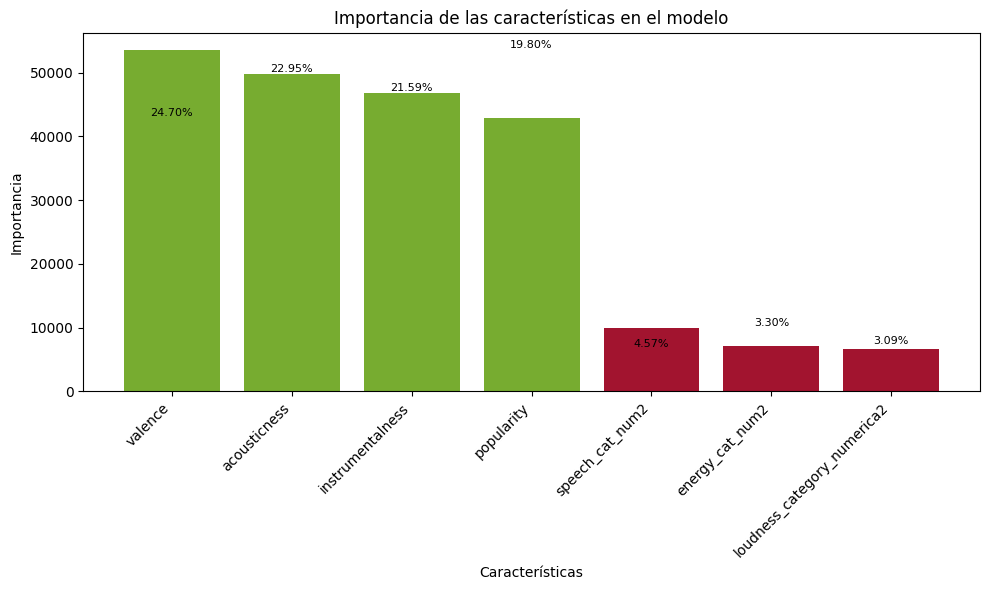

In [140]:
import matplotlib.pyplot as plt

# Lista de colores para cada barra
colors = ['#77AC30', '#77AC30', '#77AC30', '#77AC30', '#A2142F', '#A2142F', '#A2142F', '#A2142F', '#A2142F']

# Calcular el total de importancia para normalizar los valores a porcentaje
total_importance = importance_df['Importance'].sum()

# Calcular el porcentaje de importancia para cada característica
importance_df['Importance_percent'] = (importance_df['Importance'] / total_importance) * 100

# Crear el gráfico de barras con colores personalizados y porcentaje de importancia
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características en el modelo')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad

# Añadir porcentaje de importancia en las etiquetas del eje y
for i, importance in enumerate(importance_df['Importance_percent']):
    plt.text(i, importance_df['Importance'][i] + 0.5, f'{importance:.2f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se solapen
plt.show()


In [132]:
# Predicciones sobre TRAIN
pred_train = final_model1.predict(X_train)
pred_proba_train = final_model1.predict_proba(X_train)


print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train))
print('Recall:', recall_score(y_train, pred_train))
print('F1 Score:', f1_score(y_train, pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model1.predict(X_test)
pred_proba_test = final_model1.predict_proba(X_test)
pred_proba_test_prob = pred_proba_test * 100
print(pred_proba_test_prob)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test))
print('Recall:', recall_score(y_test, pred_test))
print('F1 Score:', f1_score(y_test, pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

[[87.078705  12.921297 ]
 [89.67711   10.322889 ]
 [ 5.4762897 94.52371  ]
 ...
 [80.13277   19.86723  ]
 [11.339265  88.660736 ]
 [91.784096   8.215903 ]]
Resultados sobre TRAIN
Accuracy: 0.981675
Precision: 0.9731276638928354
Recall: 0.9970470803526867
F1 Score: 0.9849421721892397
Confusion Matrix:
 [[15294   662]
 [   71 23973]]
[[79.92392   20.076078 ]
 [98.61524    1.3847595]
 [12.437593  87.56241  ]
 ...
 [18.297684  81.70232  ]
 [60.01529   39.98471  ]
 [ 8.29342   91.70658  ]]
Resultados sobre TEST
Accuracy: 0.7554
Precision: 0.7695423855963991
Recall: 0.8493128001324722
F1 Score: 0.8074622166246851
Confusion Matrix:
 [[2425 1536]
 [ 910 5129]]


In [138]:
from sklearn.metrics import classification_report
class_labels = ['poca danceability', 'mucha danceability']


pred_labels = [1 if proba >= 0.5 else 0 for proba in pred_proba_test[:, 1]]


report = classification_report(y_test, pred_labels, target_names=class_labels)






                    precision    recall  f1-score   support

 poca danceability       0.73      0.61      0.66      3961
mucha danceability       0.77      0.85      0.81      6039

          accuracy                           0.76     10000
         macro avg       0.75      0.73      0.74     10000
      weighted avg       0.75      0.76      0.75     10000



In [42]:
filename = '../models_class/final_model2.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_model1, archivo_salida)

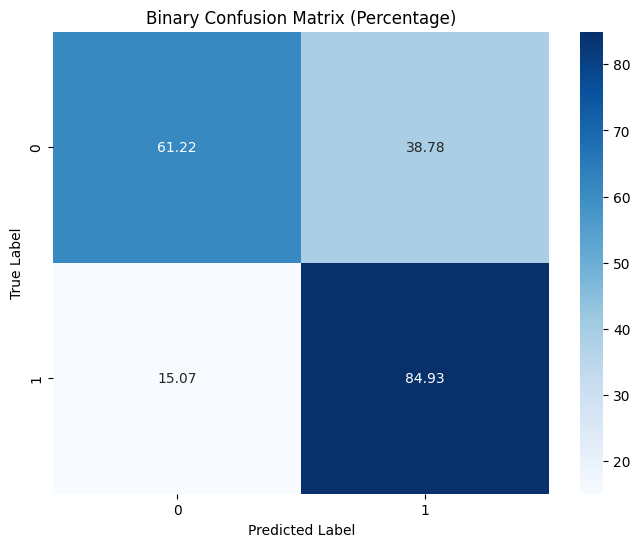

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


c_matrix_binary = confusion_matrix(y_test, pred_test)

total_samples = c_matrix_binary.sum(axis=1)[:, np.newaxis]
c_matrix_binary_percent = (c_matrix_binary / total_samples) * 100


plt.figure(figsize=(8, 6))


sns.heatmap(c_matrix_binary_percent, annot=True, cmap='Blues', fmt='.2f')

plt.title('Binary Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

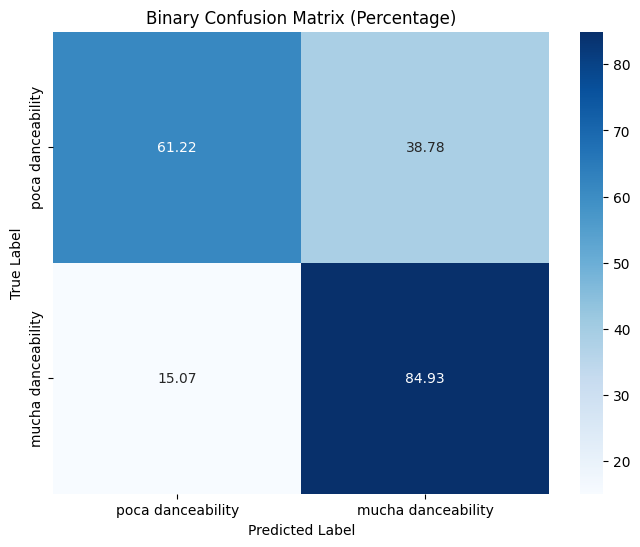

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


c_matrix_binary = confusion_matrix(y_test, pred_test)

total_samples = c_matrix_binary.sum(axis=1)[:, np.newaxis]
c_matrix_binary_percent = (c_matrix_binary / total_samples) * 100


class_labels = ['poca danceability', 'mucha danceability']


plt.figure(figsize=(8, 6))


sns.heatmap(c_matrix_binary_percent, annot=True, cmap='Blues', fmt='.2f', xticklabels=class_labels, yticklabels=class_labels)

plt.title('Binary Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### Model 3: Gradient Boosting Classifier

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline


steps = [('classifier', GradientBoostingClassifier(random_state=42))]
pipeline = Pipeline(steps)


param_dist = {
    'classifier__n_estimators': [60, 100, 150],  
    'classifier__learning_rate': [0.01, 0.05, 0.1], 
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_samples_split': [2, 3, 4],
    'classifier__min_samples_leaf': [1, 2, 3],
    'classifier__subsample': [0.8, 0.9, 1.0]
}


random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=4, n_iter=30, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)


final_model = random_search.best_estimator_


best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_


final_model.fit(X_train, y_train)

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)



Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best Score: 0.7560250000000001
Best Parameters: {'classifier__subsample': 0.9, 'classifier__n_estimators': 150, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 3, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}
Best Estimator: Pipeline(steps=[('classifier',
                 GradientBoostingClassifier(max_depth=5, min_samples_leaf=3,
                                            n_estimators=150, random_state=42,
                                            subsample=0.9))])


In [101]:
# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train)
pred_proba_train = final_model.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train))
print('Recall:', recall_score(y_train, pred_train))
print('F1 Score:', f1_score(y_train, pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test)
pred_proba_test = final_model.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test))
print('Recall:', recall_score(y_test, pred_test))
print('F1 Score:', f1_score(y_test, pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 0.786
Precision: 0.7817731838695589
Recall: 0.8933621693561803
F1 Score: 0.8338509316770186
Confusion Matrix:
 [[ 9960  5996]
 [ 2564 21480]]
Resultados sobre TEST
Accuracy: 0.7447
Precision: 0.7517331022530329
Recall: 0.8618976651763537
F1 Score: 0.8030548484147189
Confusion Matrix:
 [[2242 1719]
 [ 834 5205]]


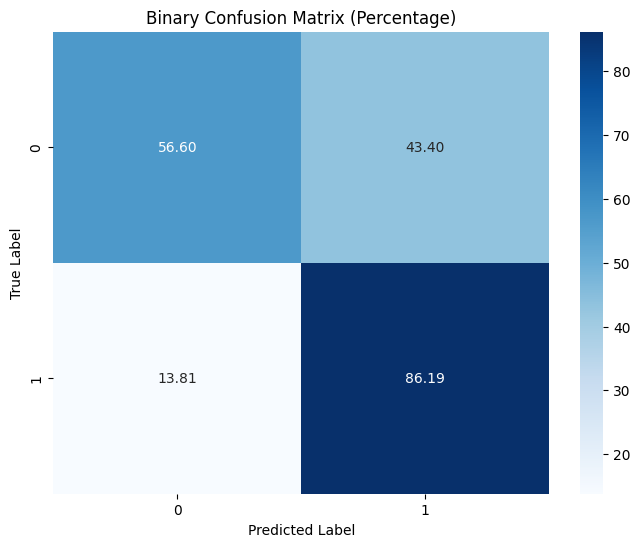

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


c_matrix_binary = confusion_matrix(y_test, pred_test)


total_samples = c_matrix_binary.sum(axis=1)[:, np.newaxis]
c_matrix_binary_percent = (c_matrix_binary / total_samples) * 100


plt.figure(figsize=(8, 6))


sns.heatmap(c_matrix_binary_percent, annot=True, cmap='viridis', fmt='.2f')

plt.title('Binary Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [50]:
filename = '../models_class/final_model3.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_model, archivo_salida)

### Model 3: Gradiente Boost con nuevas variables

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline


steps = [('classifier', GradientBoostingClassifier(random_state=42))]
pipeline = Pipeline(steps)


param_dist = {
    'classifier__n_estimators': [200, 300],  
    'classifier__learning_rate': [0.01, 0.05, 0.1],  
    'classifier__max_depth': [5, 6, 7],
    'classifier__min_samples_split': [2, 3, 4],
    'classifier__min_samples_leaf': [1, 2, 3],
    'classifier__subsample': [0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=4, n_iter=30, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train1, y_train1)


final_model = random_search.best_estimator_

best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

final_model.fit(X_train1, y_train1)

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


KeyboardInterrupt: 

In [78]:
# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train1)
pred_proba_train = final_model.predict_proba(X_train1)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train1, pred_train))
print('Precision:', precision_score(y_train1, pred_train))
print('Recall:', recall_score(y_train1, pred_train))
print('F1 Score:', f1_score(y_train1, pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train1, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test1)
pred_proba_test = final_model.predict_proba(X_test1)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test1, pred_test))
print('Precision:', precision_score(y_test1, pred_test))
print('Recall:', recall_score(y_test1, pred_test))
print('F1 Score:', f1_score(y_test1, pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test1, pred_test))

Resultados sobre TRAIN
Accuracy: 0.7743
Precision: 0.7685072598526572
Recall: 0.8937364831142904
F1 Score: 0.8264046456178133
Confusion Matrix:
 [[ 9483  6473]
 [ 2555 21489]]
Resultados sobre TEST
Accuracy: 0.7343
Precision: 0.7399943230201533
Recall: 0.8633879781420765
F1 Score: 0.7969430645777608
Confusion Matrix:
 [[2129 1832]
 [ 825 5214]]


### Model 4: KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


steps = [
         ('classifier', KNeighborsClassifier())]
pipeline = Pipeline(steps)


param_dist = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  
}


random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=4, n_iter=10, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)


final_model = random_search.best_estimator_


final_model.fit(X_train, y_train)


best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best Score: 0.714625
Best Parameters: {'classifier__weights': 'distance', 'classifier__p': 1, 'classifier__n_neighbors': 11}
Best Estimator: Pipeline(steps=[('classifier',
                 KNeighborsClassifier(n_neighbors=11, p=1,
                                      weights='distance'))])


In [55]:
# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train)
pred_proba_train = final_model.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train))
print('Recall:', recall_score(y_train, pred_train))
print('F1 Score:', f1_score(y_train, pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test)
pred_proba_test = final_model.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test))
print('Recall:', recall_score(y_test, pred_test))
print('F1 Score:', f1_score(y_test, pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[15956     0]
 [    0 24044]]
Resultados sobre TEST
Accuracy: 0.7164
Precision: 0.7504300234558249
Recall: 0.7946679913893029
F1 Score: 0.7719157149750684
Confusion Matrix:
 [[2365 1596]
 [1240 4799]]


In [56]:
filename = '../models_class/final_model4.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_model, archivo_salida)

### Model 5: SVC

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from scipy.stats import uniform

# Definir el pipeline con PCA y el clasificador Logistic Regression
steps = [('pca', PCA()),
         ('classifier', LogisticRegression())]
pipeline = Pipeline(steps)


param_dist = {
    'pca__n_components': [5, 10, 15],  
    'classifier__C': uniform(loc=0, scale=4), 
    'classifier__penalty': ['l1', 'l2'], 
    'classifier__solver': ['liblinear']  
}


random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=4, n_iter=30, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)


final_model = random_search.best_estimator_

final_model.fit(X_train, y_train)


best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)




Fitting 4 folds for each of 30 candidates, totalling 120 fits


c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
88 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\anaes\AppDa

Best Score: 0.687775
Best Parameters: {'classifier__C': 2.9279757672456204, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear', 'pca__n_components': 5}
Best Estimator: Pipeline(steps=[('pca', PCA(n_components=5)),
                ('classifier',
                 LogisticRegression(C=2.9279757672456204, penalty='l1',
                                    solver='liblinear'))])


In [61]:
# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train)
pred_proba_train = final_model.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train))
print('Recall:', recall_score(y_train, pred_train))
print('F1 Score:', f1_score(y_train, pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test)
pred_proba_test = final_model.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test))
print('Recall:', recall_score(y_test, pred_test))
print('F1 Score:', f1_score(y_test, pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 0.687875
Precision: 0.6898341271144687
Recall: 0.8734819497587756
F1 Score: 0.7708711850098185
Confusion Matrix:
 [[ 6513  9443]
 [ 3042 21002]]
Resultados sobre TEST
Accuracy: 0.6825
Precision: 0.6877786519800682
Recall: 0.8685212783573439
F1 Score: 0.7676545920234175
Confusion Matrix:
 [[1580 2381]
 [ 794 5245]]


In [62]:
filename = '../models_class/final_model5.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_model, archivo_salida)

## Random Forest con PCA

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Definir el pipeline con PCA y el clasificador RandomForest
steps = [('pca', PCA()),
         ('classifier', RandomForestClassifier(random_state=42))]
pipeline = Pipeline(steps)


param_dist = {
    'pca__n_components': [6, 7],  # Número de componentes principales
    'classifier__n_estimators': [ 70, 90],
    'classifier__max_depth': [15, 20, 30],
    'classifier__max_leaf_nodes': [90, 95, 100],
    'classifier__min_samples_split': [15, 20]
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=4, n_iter=30, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

final_model = random_search.best_estimator_


final_model.fit(X_train, y_train)


best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best Score: 0.744675
Best Parameters: {'pca__n_components': 7, 'classifier__n_estimators': 90, 'classifier__min_samples_split': 20, 'classifier__max_leaf_nodes': 100, 'classifier__max_depth': 20}
Best Estimator: Pipeline(steps=[('pca', PCA(n_components=7)),
                ('classifier',
                 RandomForestClassifier(max_depth=20, max_leaf_nodes=100,
                                        min_samples_split=20, n_estimators=90,
                                        random_state=42))])


In [90]:
# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train)
pred_proba_train = final_model.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train))
print('Recall:', recall_score(y_train, pred_train))
print('F1 Score:', f1_score(y_train, pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test)
pred_proba_test = final_model.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test))
print('Recall:', recall_score(y_test, pred_test))
print('F1 Score:', f1_score(y_test, pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 0.75895
Precision: 0.7591592888505002
Recall: 0.8773082681750125
F1 Score: 0.8139687439706733
Confusion Matrix:
 [[ 9264  6692]
 [ 2950 21094]]
Resultados sobre TEST
Accuracy: 0.7337
Precision: 0.7414878397711016
Recall: 0.8582546779268091
F1 Score: 0.7956097935374933
Confusion Matrix:
 [[2154 1807]
 [ 856 5183]]


In [67]:
filename = '../models_class/final_model_pca.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_model, archivo_salida)

## Intentemos mejorar Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Definir el pipeline con el clasificador RandomForest
steps = [('classifier', RandomForestClassifier(random_state=42))]
pipeline = Pipeline(steps)


param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [5, 10, 15],
    'classifier__max_features': ['sqrt', 'log2']
}


random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=4, n_iter=50, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)


final_model = random_search.best_estimator_


best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

final_model.fit(X_train, y_train)

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)



Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best Score: 0.762025
Best Parameters: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__max_features': 'log2', 'classifier__max_depth': 15}
Best Estimator: Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=15, max_features='log2',
                                        min_samples_split=5, n_estimators=300,
                                        random_state=42))])


In [71]:
# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train)
pred_proba_train = final_model.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train))
print('Recall:', recall_score(y_train, pred_train))
print('F1 Score:', f1_score(y_train, pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test)
pred_proba_test = final_model.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test))
print('Recall:', recall_score(y_test, pred_test))
print('F1 Score:', f1_score(y_test, pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 0.87665
Precision: 0.8502822787594398
Recall: 0.9646481450673765
F1 Score: 0.9038618915864541
Confusion Matrix:
 [[11872  4084]
 [  850 23194]]
Resultados sobre TEST
Accuracy: 0.7521
Precision: 0.7564102564102564
Recall: 0.8695148203344925
F1 Score: 0.8090285802326477
Confusion Matrix:
 [[2270 1691]
 [ 788 5251]]


In [72]:
filename = '../models_class/final_model_random.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_model, archivo_salida)

## Seguimos intentando mejorar el modelo

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Definir el pipeline con el clasificador RandomForest
steps = [
    ('scaler', StandardScaler()),
   
    ('classifier', RandomForestClassifier(random_state=42))
]
pipeline = Pipeline(steps)


param_dist = {
    
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [5, 10, 15],
    'classifier__max_features': ['sqrt', 'log2']
}


random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=4, n_iter=50, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)

final_model = random_search.best_estimator_


best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

final_model.fit(X_train, y_train)

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Fitting 4 folds for each of 50 candidates, totalling 200 fits
Best Score: 0.7621249999999999
Best Parameters: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__max_features': 'log2', 'classifier__max_depth': 15}
Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=15, max_features='log2',
                                        min_samples_split=5, n_estimators=300,
                                        random_state=42))])


In [74]:
# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train)
pred_proba_train = final_model.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train))
print('Recall:', recall_score(y_train, pred_train))
print('F1 Score:', f1_score(y_train, pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test)
pred_proba_test = final_model.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test))
print('Recall:', recall_score(y_test, pred_test))
print('F1 Score:', f1_score(y_test, pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 0.8765
Precision: 0.8501209588739829
Recall: 0.9646065546498087
F1 Score: 0.9037524841211082
Confusion Matrix:
 [[11867  4089]
 [  851 23193]]
Resultados sobre TEST
Accuracy: 0.7527
Precision: 0.7566206102475532
Recall: 0.870508362311641
F1 Score: 0.8095788095788096
Confusion Matrix:
 [[2270 1691]
 [ 782 5257]]


## Intentar subir Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Definir el pipeline con el clasificador Random Forest
steps = [('classifier', RandomForestClassifier(random_state=42))]
pipeline = Pipeline(steps)


param_dist = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_depth': [5, 10, 15, 20, None],
    'classifier__min_samples_split': [2, 5, 10, 15, 20],
    'classifier__min_samples_leaf': [1, 2, 4, 8, 12],
    'classifier__max_features': ['auto', 'sqrt', 'log2', None],
    'classifier__bootstrap': [True, False]
}


random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=4, n_iter=100, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)


final_model = random_search.best_estimator_


best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_


final_model.fit(X_train, y_train)

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Fitting 4 folds for each of 100 candidates, totalling 400 fits


c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
128 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
99 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\anaes\AppD

Best Score: 0.763725
Best Parameters: {'classifier__n_estimators': 400, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 20, 'classifier__bootstrap': False}
Best Estimator: Pipeline(steps=[('classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=20,
                                        min_samples_leaf=2, n_estimators=400,
                                        random_state=42))])


In [80]:
# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train)
pred_proba_train = final_model.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train))
print('Recall:', recall_score(y_train, pred_train))
print('F1 Score:', f1_score(y_train, pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test)
pred_proba_test = final_model.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test))
print('Recall:', recall_score(y_test, pred_test))
print('F1 Score:', f1_score(y_test, pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 0.8262
Precision: 0.8129256682533871
Recall: 0.9233488604225586
F1 Score: 0.8646259298204619
Confusion Matrix:
 [[10847  5109]
 [ 1843 22201]]
Resultados sobre TEST
Accuracy: 0.7473
Precision: 0.755604075691412
Recall: 0.8595794005630071
F1 Score: 0.8042451003176079
Confusion Matrix:
 [[2282 1679]
 [ 848 5191]]


## Random Forest dando peso a la precision

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, make_scorer

# Definir el pipeline con el clasificador RandomForest
steps = [('classifier', RandomForestClassifier(random_state=42))]
pipeline = Pipeline(steps)


precision_weighted = make_scorer(precision_score, average='weighted')


param_dist = {
    'classifier__n_estimators': [ 50, 100],
    'classifier__max_depth': [10, 15, 20],
    'classifier__max_leaf_nodes': [100, 150, 200],
    'classifier__min_samples_split': [10, 20, 25] 
}


random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=4, scoring=precision_weighted, n_iter=30, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)


final_model = random_search.best_estimator_


best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_


final_model.fit(X_train, y_train)

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best Score: 0.7562736476951404
Best Parameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 25, 'classifier__max_leaf_nodes': 200, 'classifier__max_depth': 15}
Best Estimator: Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=15, max_leaf_nodes=200,
                                        min_samples_split=25, n_estimators=50,
                                        random_state=42))])


In [16]:
# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train)
pred_proba_train = final_model.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train))
print('Recall:', recall_score(y_train, pred_train))
print('F1 Score:', f1_score(y_train, pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test)
pred_proba_test = final_model.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test))
print('Recall:', recall_score(y_test, pred_test))
print('F1 Score:', f1_score(y_test, pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 0.77775
Precision: 0.7673040287871304
Recall: 0.9045915820994843
F1 Score: 0.8303111280778774
Confusion Matrix:
 [[ 9360  6596]
 [ 2294 21750]]
Resultados sobre TEST
Accuracy: 0.743
Precision: 0.7434385964912281
Recall: 0.8771319754926312
F1 Score: 0.8047705864478881
Confusion Matrix:
 [[2133 1828]
 [ 742 5297]]


## Intentar mejorar el Random Forest


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, make_scorer


steps = [('classifier', RandomForestClassifier(random_state=42))]
pipeline = Pipeline(steps)


precision_weighted = make_scorer(precision_score, average='weighted')


param_dist = {
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__max_leaf_nodes': [50, 100, 150, 200],
    'classifier__min_samples_split': [2, 5, 10, 15],
    'classifier__min_samples_leaf': [1, 2, 4, 8],
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__bootstrap': [True, False],
    'classifier__class_weight': [None, 'balanced', 'balanced_subsample']
}

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=StratifiedKFold(n_splits=5), scoring=precision_weighted, n_iter=100, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)


final_model = random_search.best_estimator_


best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_


final_model.fit(X_train, y_train)

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)




Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Score: 0.7570418346785557
Best Parameters: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_leaf_nodes': 200, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 20, 'classifier__class_weight': None, 'classifier__bootstrap': False}
Best Estimator: Pipeline(steps=[('classifier',
                 RandomForestClassifier(bootstrap=False, max_depth=20,
                                        max_leaf_nodes=200, min_samples_leaf=2,
                                        min_samples_split=5, n_estimators=200,
                                        random_state=42))])


In [110]:
# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train)
pred_proba_train = final_model.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train))
print('Recall:', recall_score(y_train, pred_train))
print('F1 Score:', f1_score(y_train, pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test)
pred_proba_test = final_model.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test))
print('Recall:', recall_score(y_test, pred_test))
print('F1 Score:', f1_score(y_test, pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 0.860375
Precision: 0.8418713190354484
Recall: 0.9452670104807852
F1 Score: 0.890578162653553
Confusion Matrix:
 [[11687  4269]
 [ 1316 22728]]
Resultados sobre TEST
Accuracy: 0.7488
Precision: 0.7573325550853641
Recall: 0.8594138102334824
F1 Score: 0.805150480918399
Confusion Matrix:
 [[2298 1663]
 [ 849 5190]]


In [111]:
filename = '../models_class/final_model_random_kfold.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_model, archivo_salida)

## Vamos a intentar mejorar Gradient Boosting 

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


steps = [('classifier', GradientBoostingClassifier(random_state=42))]
pipeline = Pipeline(steps)


param_grid = {
    'classifier__n_estimators': [200, 250],  
    'classifier__learning_rate': [0.01, 0.05, 0.1], 
    'classifier__max_depth': [ 6, 7, 8],
    'classifier__min_samples_split': [2, 3, 4],
    'classifier__min_samples_leaf': [1, 2, 3],
    'classifier__subsample': [0.8, 0.9]
}


grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


final_model = grid_search.best_estimator_


best_score = grid_search.best_score_
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


final_model.fit(X_train, y_train)

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)



Fitting 2 folds for each of 324 candidates, totalling 648 fits
Best Score: 0.756675
Best Parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 8, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 250, 'classifier__subsample': 0.8}
Best Estimator: Pipeline(steps=[('classifier',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=8,
                                            min_samples_leaf=2,
                                            n_estimators=250, random_state=42,
                                            subsample=0.8))])


In [51]:
# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train)
pred_proba_train = final_model.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train))
print('Recall:', recall_score(y_train, pred_train))
print('F1 Score:', f1_score(y_train, pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test)
pred_proba_test = final_model.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test))
print('Recall:', recall_score(y_test, pred_test))
print('F1 Score:', f1_score(y_test, pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 0.79205
Precision: 0.7861561976854211
Recall: 0.898436200299451
F1 Score: 0.8385544039439463
Confusion Matrix:
 [[10080  5876]
 [ 2442 21602]]
Resultados sobre TEST
Accuracy: 0.7461
Precision: 0.7539912917271407
Recall: 0.8602417618811061
F1 Score: 0.8036197695104029
Confusion Matrix:
 [[2266 1695]
 [ 844 5195]]


## Probamos SelectKBest

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif

# Definir el pipeline con el clasificador Gradient Boosting y SelectKBest
steps = [
    ('feature_selection', SelectKBest(score_func=f_classif)),  # SelectKBest
    ('classifier', GradientBoostingClassifier(random_state=42))  # GradientBoostingClassifier
]
pipeline = Pipeline(steps)


param_dist = {
    'feature_selection__k': [5, 10, 15],  
    'classifier__n_estimators': [60, 100, 150],
    'classifier__learning_rate': [0.05, 0.1],  
    'classifier__max_depth': [6, 7, 8],
    'classifier__min_samples_split': [1, 2, 3],
    'classifier__min_samples_leaf': [3, 4, 5],
    'classifier__subsample': [0.7, 0.8, 0.9, 1.0]
}


random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=4, n_iter=30, n_jobs=-1, random_state=42, verbose=2)
random_search.fit(X_train, y_train)


final_model = random_search.best_estimator_


best_score = random_search.best_score_
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

final_model.fit(X_train, y_train)

print("Best Score:", best_score)
print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Fitting 4 folds for each of 30 candidates, totalling 120 fits


c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\anaes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\anaes\AppDa

Best Score: 0.7579750000000001
Best Parameters: {'feature_selection__k': 15, 'classifier__subsample': 1.0, 'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 7, 'classifier__learning_rate': 0.1}
Best Estimator: Pipeline(steps=[('feature_selection', SelectKBest(k=15)),
                ('classifier',
                 GradientBoostingClassifier(max_depth=7, min_samples_leaf=4,
                                            random_state=42))])


In [106]:
# Predicciones sobre TRAIN
pred_train = final_model.predict(X_train)
pred_proba_train = final_model.predict_proba(X_train)

print("Resultados sobre TRAIN")
print('Accuracy:', accuracy_score(y_train, pred_train))
print('Precision:', precision_score(y_train, pred_train))
print('Recall:', recall_score(y_train, pred_train))
print('F1 Score:', f1_score(y_train, pred_train))
print('Confusion Matrix:\n', confusion_matrix(y_train, pred_train))

# Predicciones sobre TEST
pred_test = final_model.predict(X_test)
pred_proba_test = final_model.predict_proba(X_test)

print("Resultados sobre TEST")
print('Accuracy:', accuracy_score(y_test, pred_test))
print('Precision:', precision_score(y_test, pred_test))
print('Recall:', recall_score(y_test, pred_test))
print('F1 Score:', f1_score(y_test, pred_test))
print('Confusion Matrix:\n', confusion_matrix(y_test, pred_test))

Resultados sobre TRAIN
Accuracy: 0.8095
Precision: 0.8006076579544622
Recall: 0.9096240226251872
F1 Score: 0.8516412912269772
Confusion Matrix:
 [[10509  5447]
 [ 2173 21871]]
Resultados sobre TEST
Accuracy: 0.7468
Precision: 0.7554260742898762
Recall: 0.8587514489153834
F1 Score: 0.8037817730936144
Confusion Matrix:
 [[2282 1679]
 [ 853 5186]]


In [107]:
filename = '../models_class/final_model_selectkbest.pkl'
with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_model, archivo_salida)

## Dataframe con los resultados de los mejores cuatro modelos

In [2]:
import pandas as pd


resultados = {
    "Modelo": ["RandomForest", 'XGBClassifier',"GradientBoosting", "GradientBoostinKBest", 'KNN', 'SVC', 'RandomForest_PCA', 'RandomForestkfold'],
    "Accuracy": [0.7435, 0.7554,  0.7447, 0.7468, 0.7164,  0.6825, 0.7337, 0.7488],
    "Precision": [0.7395862068965517, 0.7695423855963991, 0.7517331022530329, 0.7554260742898762, 0.7504300234558249, 0.6877786519800682, 0.7414878397711016, 0.7573325550853641],
    "Recall": [0.8878953469117403, 0.8493128001324722, 0.8618976651763537, 0.8587514489153834, 0.7946679913893029, 0.8685212783573439, 0.8582546779268091, 0.8594138102334824]
}


df_resultados = pd.DataFrame(resultados)

df_resultados


,Modelo,Accuracy,Precision,Recall
0,RandomForest,0.7435,0.739586,0.887895
1,XGBClassifier,0.7554,0.769542,0.849313
2,GradientBoosting,0.7447,0.751733,0.861898
3,GradientBoostinKBest,0.7468,0.755426,0.858751
4,KNN,0.7164,0.750430,0.794668
5,SVC,0.6825,0.687779,0.868521
6,RandomForest_PCA,0.7337,0.741488,0.858255
7,RandomForestkfold,0.7488,0.757333,0.859414
